In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
#membuat fungsi hsv 
def hsv(y, z):
    return cv.cvtColor(cv.imread('KELAS'+str(z)+'/'+str(y)+'.jpg'), cv.COLOR_BGR2HSV)

In [4]:
#membaca data tiap kelas dan dimasukkan ke list kelas
kelas1=list()
kelas2=list()
kelas3=list()
kelas4=list()
kelas5=list()

for i in range(1,33):
    kelas1.insert(i, hsv(i,1))
    kelas2.insert(i, hsv(i,2))
    kelas3.insert(i, hsv(i,3))
    kelas4.insert(i, hsv(i,4))
    kelas5.insert(i, hsv(i,5))



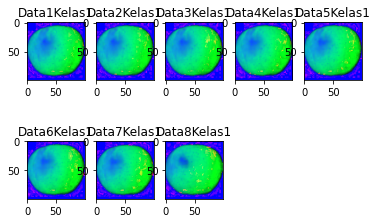

In [5]:
#Menampilkan HSV Kelas 1
for i in range(8):
     plt.subplot(2, 5, i+1)
     plt.title('Data' + str(i+1) + 'Kelas1')
     plt.imshow(kelas1[i])
plt.show()

In [6]:
#Membuat histogram
hist1=list()
hist2=list()
hist3=list()
hist4=list()
hist5=list()


for i in range(32):
    hist_1, bins = np.histogram(kelas1[i].ravel(), 256, [0,256])
    hist1.append(hist_1)

    hist_2, bins = np.histogram(kelas2[i].ravel(), 256, [0,256])
    hist2.append(hist_2)

    hist_3, bins = np.histogram(kelas3[i].ravel(), 256, [0,256])
    hist3.append(hist_3)
    
    hist_4, bins = np.histogram(kelas4[i].ravel(), 256, [0,256])
    hist4.append(hist_4)

    hist_5, bins = np.histogram(kelas5[i].ravel(), 256, [0,256])
    hist5.append(hist_5)

In [7]:
#Mengubah vektor ke matriks dan lakukan transpose matriks
trans1=list()
trans2=list()
trans3=list()
trans4=list()
trans5=list()

for i in range (32):
    trans_1=np.transpose(hist1[i][0:18,np.newaxis])
    trans1.append(trans_1)

    trans_2=np.transpose(hist2[i][0:18,np.newaxis])
    trans2.append(trans_2)

    trans_3=np.transpose(hist3[i][0:18,np.newaxis])
    trans3.append(trans_3)

    trans_4=np.transpose(hist4[i][0:18,np.newaxis])
    trans4.append(trans_4)

    trans_5=np.transpose(hist5[i][0:18,np.newaxis])
    trans5.append(trans_5)




In [8]:
#gabungkan data citra menjadi satu matriks data
Data = np.concatenate((trans1[0],trans1[1],trans1[2],trans1[3],trans1[4],trans1[5],trans1[6],trans1[7],trans1[8],trans1[9],trans1[10],trans1[11],trans1[12],trans1[13],trans1[14],trans1[15],trans1[16],trans1[17],trans1[18],trans1[19],trans1[20],trans1[21],trans1[22],trans1[23],trans1[24],trans1[25],trans1[26],trans1[27],trans1[28],trans1[29],trans1[30],trans1[31],trans2[0],trans2[1],trans2[2],trans2[3],trans2[4],trans2[5],trans2[6],trans2[7],trans2[8],trans2[9],trans2[10],trans2[11],trans2[12],trans2[13],trans2[14],trans2[15],trans2[16],trans2[17],trans2[18],trans2[19],trans2[20],trans2[21],trans2[22],trans2[23],trans2[24],trans2[25],trans2[26],trans2[27],trans2[28],trans2[29],trans2[30],trans2[31],trans3[0],trans3[1],trans3[2],trans3[3],trans3[4],trans3[5],trans3[6],trans3[7],trans3[8],trans3[9],trans3[10],trans3[11],trans3[12],trans3[13],trans3[14],trans3[15],trans3[16],trans3[17],trans3[18],trans3[19],trans3[20],trans3[21],trans3[22],trans3[23],trans3[24],trans3[25],trans3[26],trans3[27],trans3[28],trans3[29],trans3[30],trans3[31],trans4[0],trans4[1],trans4[2],trans4[3],trans4[4],trans4[5],trans4[6],trans4[7],trans4[8],trans4[9],trans4[10],trans4[11],trans4[12],trans4[13],trans4[14],trans4[15],trans4[16],trans4[17],trans4[18],trans4[19],trans4[20],trans4[21],trans4[22],trans4[23],trans4[24],trans4[25],trans4[26],trans4[27],trans4[28],trans4[29],trans4[30],trans4[31],trans5[0],trans5[1],trans5[2],trans5[3],trans5[4],trans5[5],trans5[6],trans5[7],trans5[8],trans5[9],trans5[10],trans5[11],trans5[12],trans5[13],trans5[14],trans5[15],trans5[16],trans5[17],trans5[18],trans5[19],trans5[20],trans5[21],trans5[22],trans5[23],trans5[24],trans5[25],trans5[26],trans5[27],trans5[28],trans5[29],trans5[30],trans5[31]), axis=0).astype(np.float32)

In [9]:
#membuat responses kelas
responses = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]).astype(np.float32)

In [10]:
# Split Data (Train dan Test)
x_train, x_test, y_train, y_test,= train_test_split(
    Data, responses, test_size=0.2, random_state=5)


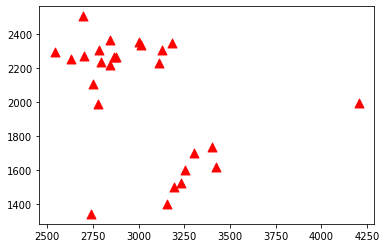

In [11]:
# Scatter Kelas 1 (Visualisasi)
red = x_train[y_train.ravel() == 1]
plt.scatter(red[:, 0], red[:, 1], 80, 'red', '^')


In [12]:
# Inisialisasi KNN (K = 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)  # Melatih Data (Train)
res = knn.predict(x_test)  # Prediksi Data Test


In [13]:
# Hasil Klasifikasi
print("Hasil Klasifikasi Data Testing (KNN) = ", res)  # Hasil Klasifikasi Untuk Data Testing
print("Kelas yang seharusnya benar (KNN)    = ", y_test)

Hasil Klasifikasi Data Testing (KNN) =  [1. 3. 3. 5. 5. 2. 1. 5. 1. 1. 4. 2. 2. 2. 4. 2. 5. 3. 3. 2. 2. 3. 2. 2.
 2. 5. 1. 3. 1. 5. 5. 2.]
Kelas yang seharusnya benar (KNN)    =  [1. 3. 3. 5. 5. 2. 1. 5. 1. 1. 4. 2. 2. 4. 4. 2. 5. 3. 3. 2. 2. 3. 2. 2.
 2. 5. 1. 3. 1. 5. 5. 4.]


In [14]:
#Menampilkan akurasi dari hasil Klasifikasi
from sklearn.metrics import accuracy_score
print('Akurasi data KNN : ', float(accuracy_score(y_test,res))*100, "%")


Akurasi data KNN :  93.75 %


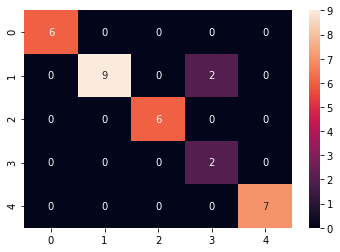

In [15]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(res,y_test)    
sns.heatmap(cm,annot=True)
plt.show()